# 실습 과제 #2. 데이터 다루기

> 2023년도 2학기 데이터애널리틱스 (JEO01425-0856)
> <br>2023년 10월 3일 ~ 2023년 10월 16일

- **문제 개요**
<br>서로 다른 세 개의 대학에서 공통으로 운영 중인 강좌 다섯 개를 샘플로 뽑아, 
<br>해당 다섯 과목 중 적어도 세 개 이상 들은 학생들을 대상으로 데이터 전처리를 진행하고 각종 통계치를 확인해보고자 한다. 
<br>이를 위한 코드를 작성하여라.

- **전체 목차**

1. 필요한 라이브러리를 모두 한 곳에 import 하세요. (5점)

2. 데이터 불러오기 (5점)
    1. 학생 정보 불러오기 (1점)
    2. 과목별 점수 불러오기 (4점)

3. 데이터 전처리 (55점)
    1. 학생 정보 전처리 (10점)
    2. 결측치 및 미응시 처리 (20점)
    3. `df_all` 만들기 (10점)
    4. 과목별 총점 추가 (10점)
    5. 데이터 저장 (5점)

4. 데이터 시각화 (35점)
    1. 학과별 수강 이력 시각화 (10점)
    2. 우수 정도 시각화 (25점)



## 1. 필요한 라이브러리를 모두 여기에 import 하세요. (5점)
- 주의
  - 다른 위치에 import할 경우 각 셀마다 감점


In [156]:
# TODO: 필요 라이브러리 가져오기
import warnings
warnings.filterwarnings(action='ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px




In [157]:
# !!! 수정 금지 !!!
SCHOOL_LIST = ['A', 'B', 'C']
GRADE_LIST = [1, 2, 3, 4]
MAJOR_LIST = ['산업공학', '컴퓨터공학', '전자공학']
SUBJECT_LIST = ['경제', '글쓰기', '물리', '미적분', '영어', '통계', '프로그래밍']

## 2. 데이터 불러오기 (5점)

### 2.1. 학생 정보 불러오기 (1점)
- 파일명이 'student.csv'인 파일을 'data'폴더로부터 불러와 df_student에 저장하세요.
- 주의
  - 절대경로가 아닌 상대경로를 이용할 것

In [158]:
# TODO: student.csv 파일 불러오기
file_path = 'data/student.csv'
df_student = pd.read_csv(file_path)

In [159]:
# !!! 수정 금지 !!!
print(df_student.shape)
df_student.head()

(100, 6)


,학교,학년,학과,과목,ID,성별
0,B,2,컴퓨터공학,"['영어', '글쓰기', '미적분', '프로그래밍']",id_000,남
1,C,3,전자공학,"['미적분', '프로그래밍', '통계']",id_001,여
2,C,3,산업공학,"['글쓰기', '영어', '미적분', '통계']",id_002,남
3,B,1,전자공학,"['미적분', '글쓰기', '영어', '프로그래밍', '통계']",id_003,여
4,C,1,전자공학,"['미적분', '프로그래밍', '영어', '통계']",id_004,여


### 2.2. 과목별 점수 불러오기 (4점)
- SUBJECT_LIST에 있는 과목명을 이용하여 각 과목별 점수를 불러와 df_subjects 딕셔너리 안에 과목명을 key로, 데이터프레임을 value로 저장하세요.
  - 즉, `df_subjects['경제']`에는 경제과목의 점수 데이터프레임이 저장되어 있어야 합니다.
  - 파일이 존재하는 경우, successed_subjects 리스트에 해당 과목명을 저장하세요.
  - 파일이 존재하지 않는 경우(FileNotFoundError)에는 무시하고 넘어가도록 예외처리를 하세요.
- 주의
  - 절대경로가 아닌 상대경로를 이용할 것
  - 파일은 'data' 폴더 하위에 '{과목명}.csv' 형태로 저장되어 있습니다.
  - SUBJECT_LIST에 있으나 파일이 존재하지 않는 경우를 수동으로 체크하지 마세요.

In [160]:
df_subjects = {}
successed_subjects = []
for subject in SUBJECT_LIST:
    # TODO: 파일이 존재하지 않는 경우 예외처리하여 df_subjects에 저장
    try:
        df_subjects[f'{subject}'] = pd.read_csv(f'data/{subject}.csv')
        successed_subjects.append(subject)
    except FileNotFoundError:
        pass



In [161]:
# !!! 수정 금지 !!!
print(successed_subjects)
print()
for subject, df_subject in df_subjects.items():
    print(subject)
    display(df_subject.head())

['글쓰기', '미적분', '영어', '통계', '프로그래밍']

글쓰기


,ID,과제1(25),과제2(30),과제3(35),출석(10)
0,id_003,NaN,29.25,24.96,9.0
1,id_097,NaN,22.59,25.35,8.0
2,id_052,13.91,17.19,22.67,6.0
3,id_027,19.35,-1.00,24.89,7.0
4,id_044,19.14,24.40,24.20,8.0


미적분


,ID,중간(30),기말(30),퀴즈(15),과제1(10),과제2(10),출석(5)
0,id_027,22.07,12.59,6.16,7.63,6.61,4.0
1,id_025,22.65,25.73,10.84,8.37,6.64,5.0
2,id_066,26.04,13.58,11.52,7.05,6.94,5.0
3,id_049,17.62,14.72,6.66,9.86,7.49,4.0
4,id_046,20.58,17.00,6.40,4.06,5.67,5.0


영어


,ID,중간(30),기말(30),과제1(15),과제2(15),출석(10)
0,id_026,16.48,24.32,14.54,11.78,10.0
1,id_045,18.46,NaN,13.28,8.68,9.0
2,id_086,25.48,27.50,14.37,12.91,9.0
3,id_097,29.04,22.49,12.81,14.69,8.0
4,id_016,17.38,18.55,11.23,9.00,9.0


통계


,ID,중간1(30),중간2(30),기말(30),출석(10)
0,id_030,16.51,8.96,15.97,8.0
1,id_062,18.69,19.87,26.47,9.0
2,id_004,4.18,21.33,7.09,10.0
3,id_025,20.58,17.53,29.79,9.0
4,id_054,27.11,19.70,13.02,10.0


프로그래밍


,ID,중간(30),기말(30),과제1(10),과제2(10),과제3(10),출석(10)
0,id_099,25.06,20.39,8.55,7.79,9.16,9.0
1,id_043,29.73,27.97,7.55,7.25,6.19,9.0
2,id_061,14.83,21.76,6.43,8.45,5.88,9.0
3,id_068,12.01,15.07,4.74,8.36,6.24,9.0
4,id_062,26.02,26.49,4.84,9.15,8.27,9.0


## 3. 데이터 전처리 (40점)

### 3.1. 학생 정보 전처리 (10점)
- `df_student`에서 동일학교 + 동일학과 + 동일학년에 대해 최대 두 명만 존재하도록 나머지를 삭제하세요.
  - 즉, 학교, 학과, 학년이 모두 동일한 학생이 최대 두 명만 남도록 하세요.
  - 삭제되는 순서는 상관 없습니다. 제가 아래에 시연한 출력값은 ID가 큰 순서대로 삭제한 경우입니다. (참고용)

In [162]:
# TODO: 동일학교 + 동일학과 + 동일학년에 대해 최대 두 명만 남도록 나머지 삭제
df_student = df_student.groupby(['학교', '학과', '학년']).apply(lambda x: x.head(2)).reset_index(drop=True)
df_student.head()







,학교,학년,학과,과목,ID,성별
0,A,1,산업공학,"['프로그래밍', '영어', '미적분', '글쓰기', '통계']",id_051,남
1,A,1,산업공학,"['글쓰기', '영어', '통계', '미적분', '프로그래밍']",id_052,여
2,A,2,산업공학,"['미적분', '글쓰기', '프로그래밍', '통계']",id_012,남
3,A,3,산업공학,"['미적분', '영어', '프로그래밍', '통계', '글쓰기']",id_042,남
4,A,3,산업공학,"['프로그래밍', '통계', '글쓰기']",id_082,여


In [163]:
# !!! 수정 금지 !!!
df_student.head()

,학교,학년,학과,과목,ID,성별
0,A,1,산업공학,"['프로그래밍', '영어', '미적분', '글쓰기', '통계']",id_051,남
1,A,1,산업공학,"['글쓰기', '영어', '통계', '미적분', '프로그래밍']",id_052,여
2,A,2,산업공학,"['미적분', '글쓰기', '프로그래밍', '통계']",id_012,남
3,A,3,산업공학,"['미적분', '영어', '프로그래밍', '통계', '글쓰기']",id_042,남
4,A,3,산업공학,"['프로그래밍', '통계', '글쓰기']",id_082,여


### 3.2. 결측치 및 미응시 처리 (20점)
- 현재 이 데이터는 학생이 시험에 응시하지 않은 경우를 "미응시(-1)", 응시했으나 점수를 매기지 않은 경우를 "결측치(NaN)"로 처리하고 있습니다.
- 결측치와 미응시를 다음과 같이 처리하세요.

#### 3.2.1. 미응시 처리 (15점)
- (1) 과목별 성적 데이터(`df_subjects[어쩌구]`)에서 미응시(-1)를 찾아 해당 학생의 출석 점수를 2점 감점합니다. (5점)
  - 만일 2점 감점할 경우 출석 점수가 0점 미만이 되는 경우는 0점으로 처리합니다. 
- (2) 이후 해당 미응시 항목을 0점으로 처리하세요. (5점)
- 참고
  - 모든 과목에는 출석 점수가 있습니다. 따라서 예외가 발생하지 않습니다.
  - 점수가 아닌 항목(ID)에는 -1이 존재하지 않습니다. 따라서 예외가 발생하지 않습니다.
- 힌트
  - `sum(axis=1)` ... df_all에서 미응시(-1)에 해당하는 값들을 찾은 뒤, 가로축으로 전부 더하면 0 미만인 경우가 미응시 학생이 됩니다.
  - `replace()`와 비슷하게, `mask(조건, 값)`를 사용하면 특정 조건에 해당하는 값들을 다른 값으로 바꿀 수 있습니다.
  - 단순히 'df.fillna()`와 같이 사용하면 데이터프레임이 변경되지 않습니다. 따라서 `df = df.fillna()`와 같이 사용해야 합니다.

In [164]:
# TODO: 미응시 항목의 인덱스(index)를 찾아, df.loc를 이용하여 출석 점수를 2점 감점
for subject, subject_df in df_subjects.items():
    mes_students = subject_df[subject_df.sum(axis=1) < 0].index
    for student_id in mes_students:
        subject_df.loc[student_id] = subject_df.loc[student_id].apply(lambda x: max(0, x - 2))
        subject_df.loc[student_id] = subject_df.loc[student_id].replace(-1, 0)




In [165]:
# !!! 수정 금지 !!!
for subject, df_subject in df_subjects.items():
    print(subject)
    display(df_subject.head())

글쓰기


,ID,과제1(25),과제2(30),과제3(35),출석(10)
0,id_003,NaN,29.25,24.96,9.0
1,id_097,NaN,22.59,25.35,8.0
2,id_052,13.91,17.19,22.67,6.0
3,id_027,19.35,-1.00,24.89,7.0
4,id_044,19.14,24.40,24.20,8.0


미적분


,ID,중간(30),기말(30),퀴즈(15),과제1(10),과제2(10),출석(5)
0,id_027,22.07,12.59,6.16,7.63,6.61,4.0
1,id_025,22.65,25.73,10.84,8.37,6.64,5.0
2,id_066,26.04,13.58,11.52,7.05,6.94,5.0
3,id_049,17.62,14.72,6.66,9.86,7.49,4.0
4,id_046,20.58,17.00,6.40,4.06,5.67,5.0


영어


,ID,중간(30),기말(30),과제1(15),과제2(15),출석(10)
0,id_026,16.48,24.32,14.54,11.78,10.0
1,id_045,18.46,NaN,13.28,8.68,9.0
2,id_086,25.48,27.50,14.37,12.91,9.0
3,id_097,29.04,22.49,12.81,14.69,8.0
4,id_016,17.38,18.55,11.23,9.00,9.0


통계


,ID,중간1(30),중간2(30),기말(30),출석(10)
0,id_030,16.51,8.96,15.97,8.0
1,id_062,18.69,19.87,26.47,9.0
2,id_004,4.18,21.33,7.09,10.0
3,id_025,20.58,17.53,29.79,9.0
4,id_054,27.11,19.70,13.02,10.0


프로그래밍


,ID,중간(30),기말(30),과제1(10),과제2(10),과제3(10),출석(10)
0,id_099,25.06,20.39,8.55,7.79,9.16,9.0
1,id_043,29.73,27.97,7.55,7.25,6.19,9.0
2,id_061,14.83,21.76,6.43,8.45,5.88,9.0
3,id_068,12.01,15.07,4.74,8.36,6.24,9.0
4,id_062,26.02,26.49,4.84,9.15,8.27,9.0


In [166]:
# !!! 수정 금지 !!!
for subject, df_subject in df_subjects.items():
    print(subject)
    display(df_subject.head())

글쓰기


,ID,과제1(25),과제2(30),과제3(35),출석(10)
0,id_003,NaN,29.25,24.96,9.0
1,id_097,NaN,22.59,25.35,8.0
2,id_052,13.91,17.19,22.67,6.0
3,id_027,19.35,-1.00,24.89,7.0
4,id_044,19.14,24.40,24.20,8.0


미적분


,ID,중간(30),기말(30),퀴즈(15),과제1(10),과제2(10),출석(5)
0,id_027,22.07,12.59,6.16,7.63,6.61,4.0
1,id_025,22.65,25.73,10.84,8.37,6.64,5.0
2,id_066,26.04,13.58,11.52,7.05,6.94,5.0
3,id_049,17.62,14.72,6.66,9.86,7.49,4.0
4,id_046,20.58,17.00,6.40,4.06,5.67,5.0


영어


,ID,중간(30),기말(30),과제1(15),과제2(15),출석(10)
0,id_026,16.48,24.32,14.54,11.78,10.0
1,id_045,18.46,NaN,13.28,8.68,9.0
2,id_086,25.48,27.50,14.37,12.91,9.0
3,id_097,29.04,22.49,12.81,14.69,8.0
4,id_016,17.38,18.55,11.23,9.00,9.0


통계


,ID,중간1(30),중간2(30),기말(30),출석(10)
0,id_030,16.51,8.96,15.97,8.0
1,id_062,18.69,19.87,26.47,9.0
2,id_004,4.18,21.33,7.09,10.0
3,id_025,20.58,17.53,29.79,9.0
4,id_054,27.11,19.70,13.02,10.0


프로그래밍


,ID,중간(30),기말(30),과제1(10),과제2(10),과제3(10),출석(10)
0,id_099,25.06,20.39,8.55,7.79,9.16,9.0
1,id_043,29.73,27.97,7.55,7.25,6.19,9.0
2,id_061,14.83,21.76,6.43,8.45,5.88,9.0
3,id_068,12.01,15.07,4.74,8.36,6.24,9.0
4,id_062,26.02,26.49,4.84,9.15,8.27,9.0


#### 3.2.2. 결측치 처리 (5점)
- NaN(결측치)를 모두 해당 항목의 평균으로 대체하세요.
  - 가령, 경제 과목의 중간고사 점수가 결측치인 경우, 경제 과목의 중간고사 평균 점수로 대체합니다.
- 주의
  - 평균을 구할 때에는 소수점 아래 셋째 자리에서 반올림하세요. (예: 0.33333 -> 0.33)

In [167]:
# TODO: 결측치를 해당 항목의 평균으로 대체
for subject, df_subject in df_subjects.items():
    for score_item in df_subject.columns:
        if score_item != "ID": 
            mean_score = round(df_subject[score_item].mean(), 2) 
            df_subject[score_item].fillna(mean_score, inplace=True)




In [168]:
# !!! 수정 금지 !!!
for subject, df_subject in df_subjects.items():
    print(subject)
    display(df_subject.head())

글쓰기


,ID,과제1(25),과제2(30),과제3(35),출석(10)
0,id_003,18.32,29.25,24.96,9.0
1,id_097,18.32,22.59,25.35,8.0
2,id_052,13.91,17.19,22.67,6.0
3,id_027,19.35,-1.00,24.89,7.0
4,id_044,19.14,24.40,24.20,8.0


미적분


,ID,중간(30),기말(30),퀴즈(15),과제1(10),과제2(10),출석(5)
0,id_027,22.07,12.59,6.16,7.63,6.61,4.0
1,id_025,22.65,25.73,10.84,8.37,6.64,5.0
2,id_066,26.04,13.58,11.52,7.05,6.94,5.0
3,id_049,17.62,14.72,6.66,9.86,7.49,4.0
4,id_046,20.58,17.00,6.40,4.06,5.67,5.0


영어


,ID,중간(30),기말(30),과제1(15),과제2(15),출석(10)
0,id_026,16.48,24.32,14.54,11.78,10.0
1,id_045,18.46,17.19,13.28,8.68,9.0
2,id_086,25.48,27.50,14.37,12.91,9.0
3,id_097,29.04,22.49,12.81,14.69,8.0
4,id_016,17.38,18.55,11.23,9.00,9.0


통계


,ID,중간1(30),중간2(30),기말(30),출석(10)
0,id_030,16.51,8.96,15.97,8.0
1,id_062,18.69,19.87,26.47,9.0
2,id_004,4.18,21.33,7.09,10.0
3,id_025,20.58,17.53,29.79,9.0
4,id_054,27.11,19.70,13.02,10.0


프로그래밍


,ID,중간(30),기말(30),과제1(10),과제2(10),과제3(10),출석(10)
0,id_099,25.06,20.39,8.55,7.79,9.16,9.0
1,id_043,29.73,27.97,7.55,7.25,6.19,9.0
2,id_061,14.83,21.76,6.43,8.45,5.88,9.0
3,id_068,12.01,15.07,4.74,8.36,6.24,9.0
4,id_062,26.02,26.49,4.84,9.15,8.27,9.0


### 3.3. `df_all` 만들기 (10점)
- 필터링된 학생 정보(`df_student`)를 left로, 나머지 과목별 점수들(`df_subjects[어쩌구]`)을 right로 하여 left join을 수행하세요. (10점)
- 최종 column명은 다음과 같이 구성하세요.
  - `학교`, `학년`, `학과`, `과목`, `ID`, `성별`, `분류`, `과목_성적항목(최대점수)`
  - 예시: `경제_중간(30)`, `경제_기말(30)`, `경제_퀴즈(15)`, `경제_과제1(10)`, `경제_과제2(10)`, `경제_출석(5)`
- 주의
  - `df_all`에는 전체 학생이 아닌, 3.1에서 필터링된 학생만 존재해야 합니다. (left join을 하는 이유입니다.)
  - `df_subjects`에 있는 과목들이 모두 `df_all`에 존재해야 합니다.

In [169]:
df_all = df_student.copy()
#df_subjects = df_subjects[subject].copy()

# TODO: df_all 만들기
for subject, df_subject in df_subjects.items():
    new_column_names = {col: f"{subject}_{col}" for col in df_subject.columns if col != 'ID'}
    df_subject = df_subject.rename(columns=new_column_names)
    
    df_all = pd.merge(df_all, df_subject, on='ID', how='left')







In [170]:
# !!! 수정 금지 !!!
df_all.head()

,학교,학년,학과,과목,ID,성별,글쓰기_과제1(25),글쓰기_과제2(30),글쓰기_과제3(35),글쓰기_출석(10),...,통계_중간1(30),통계_중간2(30),통계_기말(30),통계_출석(10),프로그래밍_중간(30),프로그래밍_기말(30),프로그래밍_과제1(10),프로그래밍_과제2(10),프로그래밍_과제3(10),프로그래밍_출석(10)
0,A,1,산업공학,"['프로그래밍', '영어', '미적분', '글쓰기', '통계']",id_051,남,11.23,17.19,18.62,9.0,...,28.95,20.88,16.99,9.0,19.77,24.89,7.71,8.05,7.36,8.0
1,A,1,산업공학,"['글쓰기', '영어', '통계', '미적분', '프로그래밍']",id_052,여,13.91,17.19,22.67,6.0,...,18.21,21.70,18.54,8.0,17.10,23.25,9.55,4.46,4.95,6.0
2,A,2,산업공학,"['미적분', '글쓰기', '프로그래밍', '통계']",id_012,남,23.91,28.94,24.50,10.0,...,13.49,15.94,24.43,9.0,22.34,12.24,8.46,9.59,7.89,10.0
3,A,3,산업공학,"['미적분', '영어', '프로그래밍', '통계', '글쓰기']",id_042,남,16.51,27.57,31.87,10.0,...,16.81,4.98,6.09,8.0,10.36,5.88,6.72,7.68,5.56,6.0
4,A,3,산업공학,"['프로그래밍', '통계', '글쓰기']",id_082,여,15.81,26.79,24.67,8.0,...,22.86,5.85,17.07,8.0,23.21,5.89,9.14,5.45,7.21,10.0


### 3.4. 과목별 총점 추가 (10점)
- `df_all`에 각 과목별 총점을 나타내는 column을 추가하세요.
- 최종 column명은 다음과 같이 구성하세요.
  - `과목_총점` (예시: `경제_총점`)
- 주의
  - 해당 학생이 수강하지 않은 과목의 총점은 NaN이어야 합니다. (sum 함수의 min_count 파라미터를 이용하세요.)
- 참고
  총점 column의 위치는 상관 없습니다. 제가 아래에 시연한 출력값은 가장 마지막 column 뒤에 총점을 추가한 경우입니다.

In [171]:
# TODO: 과목별 총점 추가
for subject in successed_subjects:
    # 해당 과목의 모든 점수 column 선택 (ID 제외)
    score_columns = [col for col in df_all.columns if subject in col and col != f"{subject}_ID"]
    # 총점 계산 및 column 추가
    df_all[f"{subject}_총점"] = df_all[score_columns].sum(axis=1, min_count=1)

# 결과 확인
df_all.head()




,학교,학년,학과,과목,ID,성별,글쓰기_과제1(25),글쓰기_과제2(30),글쓰기_과제3(35),글쓰기_출석(10),...,프로그래밍_기말(30),프로그래밍_과제1(10),프로그래밍_과제2(10),프로그래밍_과제3(10),프로그래밍_출석(10),글쓰기_총점,미적분_총점,영어_총점,통계_총점,프로그래밍_총점
0,A,1,산업공학,"['프로그래밍', '영어', '미적분', '글쓰기', '통계']",id_051,남,11.23,17.19,18.62,9.0,...,24.89,7.71,8.05,7.36,8.0,56.04,49.60,45.00,75.82,75.78
1,A,1,산업공학,"['글쓰기', '영어', '통계', '미적분', '프로그래밍']",id_052,여,13.91,17.19,22.67,6.0,...,23.25,9.55,4.46,4.95,6.0,59.77,46.30,38.82,66.45,65.31
2,A,2,산업공학,"['미적분', '글쓰기', '프로그래밍', '통계']",id_012,남,23.91,28.94,24.50,10.0,...,12.24,8.46,9.59,7.89,10.0,87.35,64.81,NaN,62.86,70.52
3,A,3,산업공학,"['미적분', '영어', '프로그래밍', '통계', '글쓰기']",id_042,남,16.51,27.57,31.87,10.0,...,5.88,6.72,7.68,5.56,6.0,85.95,71.87,45.75,35.88,42.20
4,A,3,산업공학,"['프로그래밍', '통계', '글쓰기']",id_082,여,15.81,26.79,24.67,8.0,...,5.89,9.14,5.45,7.21,10.0,75.27,NaN,NaN,53.78,60.90


In [172]:
# !!! 수정 금지 !!!
df_all.head()

,학교,학년,학과,과목,ID,성별,글쓰기_과제1(25),글쓰기_과제2(30),글쓰기_과제3(35),글쓰기_출석(10),...,프로그래밍_기말(30),프로그래밍_과제1(10),프로그래밍_과제2(10),프로그래밍_과제3(10),프로그래밍_출석(10),글쓰기_총점,미적분_총점,영어_총점,통계_총점,프로그래밍_총점
0,A,1,산업공학,"['프로그래밍', '영어', '미적분', '글쓰기', '통계']",id_051,남,11.23,17.19,18.62,9.0,...,24.89,7.71,8.05,7.36,8.0,56.04,49.60,45.00,75.82,75.78
1,A,1,산업공학,"['글쓰기', '영어', '통계', '미적분', '프로그래밍']",id_052,여,13.91,17.19,22.67,6.0,...,23.25,9.55,4.46,4.95,6.0,59.77,46.30,38.82,66.45,65.31
2,A,2,산업공학,"['미적분', '글쓰기', '프로그래밍', '통계']",id_012,남,23.91,28.94,24.50,10.0,...,12.24,8.46,9.59,7.89,10.0,87.35,64.81,NaN,62.86,70.52
3,A,3,산업공학,"['미적분', '영어', '프로그래밍', '통계', '글쓰기']",id_042,남,16.51,27.57,31.87,10.0,...,5.88,6.72,7.68,5.56,6.0,85.95,71.87,45.75,35.88,42.20
4,A,3,산업공학,"['프로그래밍', '통계', '글쓰기']",id_082,여,15.81,26.79,24.67,8.0,...,5.89,9.14,5.45,7.21,10.0,75.27,NaN,NaN,53.78,60.90


### 3.5. 데이터 저장 (5점)
- `df_all`을 'data' 폴더에 'all.xlsx'라는 이름으로 저장하세요.
- 주의
  - index는 저장하지 않습니다.

In [173]:
# TODO: df_all을 엑셀 파일로 저장
save_file = 'all.xlsx'
df_all.to_excel(save_file, index=False)




## 4. 데이터 시각화 (35점)
- 시각화에 사용할 수 있는 라이브러리는 제한이 없습니다. (matplotlib, seaborn, plotly, ...)
- 그래프를 그리는 방법 또한 다양합니다. 직접 구글링을 통해 찾아보시라고 내 드린 과제이니 원하는 라이브러리에 대해 그래프를 그리는 방법을 찾아보세요.
- 그래프를 그리는 방법이 여러가지인 만큼, 제가 아래에 시연한 그래프들과 완전히 동일하게 그릴 필요는 없습니다. (subplot의 배치 등도 해당됩니다.)


In [174]:
# !!! 수정불필요 !!!
# 아래의 코드는 한글을 지원하지 않는 matplotlib을 위한 코드입니다. 만일 matplotlib 의존성을 가지는 라이브러리를 사용할 경우 수정하지 마세요.
import matplotlib as mpl
import matplotlib.font_manager as fm

font_path = 'etc/NanumBarunGothic.ttf'
fm.fontManager.addfont(font_path)
nanum_font = fm.FontProperties(fname=font_path)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = nanum_font.get_name()
mpl.rcParams['axes.unicode_minus'] = False

### 4.1. 학과별 수강 이력 시각화 (10점)
- 학과별로 각 과목을 몇 명이 들었는지 히트맵으로 나타내세요.
- 참고
  - 각 학생이 해당 과목을 수강했는지 여부는 총점이 NaN이 아닌지 여부로 판단하면 됩니다.
  - `df.pivot_table()`을 이용하면 쉽게 피보팅할 수 있습니다.
- 주의
  - x축은 과목명, y축은 학과명입니다. (축 내에서의 순서는 상관 없습니다.)
  - 히트맵의 값은 해당 학과에서 해당 과목을 수강한 학생 수입니다.
  - 히트맵의 값은 반드시 정수형이어야 합니다. (예: 1, 2, 3, ...)
  - 히트맵의 값이 0인 경우, 배경색으로 나타내세요.

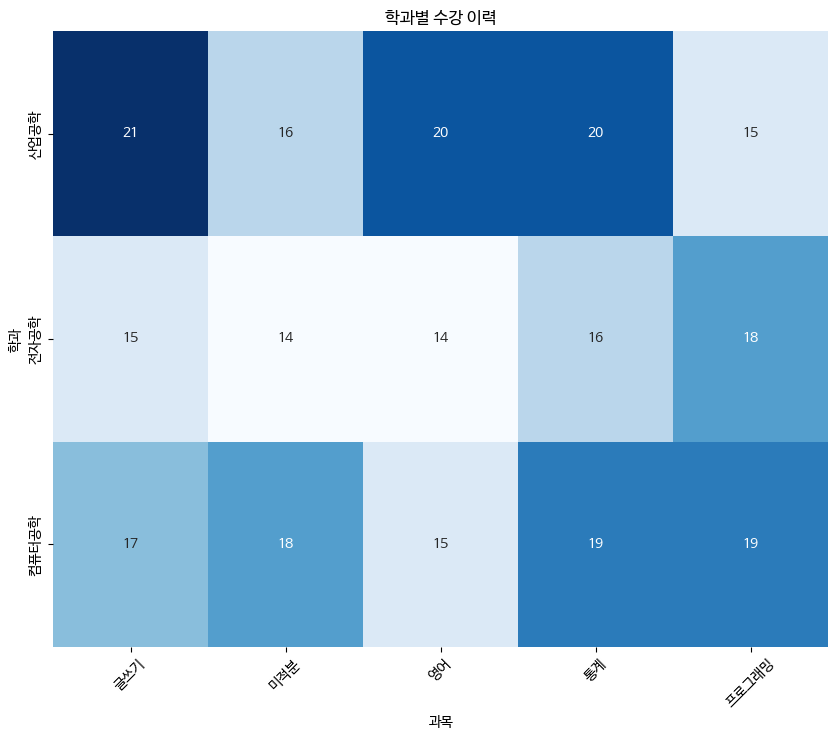

In [175]:
# TODO: 학과별 수강 이력 히트맵 그리기



subject_enrollment = {}

for subject in successed_subjects:
    df_all[f"{subject}_수강여부"] = ~df_all[f"{subject}_총점"].isna()
    subject_enrollment[subject] = df_all[df_all[f"{subject}_수강여부"]].groupby('학과').size()


df_enrollment = pd.DataFrame(subject_enrollment).fillna(0).astype(int)


plt.figure(figsize=(10, 8))
sns.heatmap(df_enrollment, annot=True, cmap="Blues", cbar=False, fmt="d")
plt.title('학과별 수강 이력')
plt.xlabel('과목')
plt.ylabel('학과')
plt.xticks(rotation=45)
plt.show()








### 4.2. 우수 정도 시각화 (25점)

#### 4.2.1. `우수과목수` column 만들기 (5점)
- 각 학생에 대해 상위 50% 안에 든 과목의 수가 몇개인지 구하여 `df_all`에 `우수과목수` column을 추가하세요. 
- 형식은 다음과 같은 문자열로 표기합니다.
  - `우수과목수` = "(상위 50% 안에 든 과목의 수)/(전체 과목의 수)"
  - 예시) 3과목을 수강한 학생의 경우, 2과목이 상위 50% 안에 들면 `우수과목수` = "2/3"
- 참고
  - 총점에 해당하는 column들만 모아 각 과목에 대한 중앙값을 구한 뒤, 이를 총점과 비교하면 됩니다.
  - 중앙값은 `median()` 함수를 이용하면 됩니다.
  - 해당 학생이 수강한 과목의 수는 '과목' column의 길이로 구하거나, 총점에서 NaN이 아닌 항목의 수로 구하면 됩니다.

In [176]:
# TODO: 우수과목수 column 만들기

#이런 식으로 해야 [상위 50% / 학생별 수강한 과목 수 ] 가 됌.
score_columns = [col for col in df_all.columns if '총점' in col]
median_scores = df_all[score_columns].median()

df_all['우수과목수'] = df_all[score_columns].apply(lambda row: f"{(row >= median_scores).sum()}/{row.count()}", axis=1)

#df_all.head()
# specific_id_row = df_all[df_all['ID'] == 'id_001']
# print(specific_id_row)



In [177]:
# !!! 수정 금지 !!!
df_all.head()

,학교,학년,학과,과목,ID,성별,글쓰기_과제1(25),글쓰기_과제2(30),글쓰기_과제3(35),글쓰기_출석(10),...,미적분_총점,영어_총점,통계_총점,프로그래밍_총점,글쓰기_수강여부,미적분_수강여부,영어_수강여부,통계_수강여부,프로그래밍_수강여부,우수과목수
0,A,1,산업공학,"['프로그래밍', '영어', '미적분', '글쓰기', '통계']",id_051,남,11.23,17.19,18.62,9.0,...,49.60,45.00,75.82,75.78,True,True,True,True,True,2/5
1,A,1,산업공학,"['글쓰기', '영어', '통계', '미적분', '프로그래밍']",id_052,여,13.91,17.19,22.67,6.0,...,46.30,38.82,66.45,65.31,True,True,True,True,True,0/5
2,A,2,산업공학,"['미적분', '글쓰기', '프로그래밍', '통계']",id_012,남,23.91,28.94,24.50,10.0,...,64.81,NaN,62.86,70.52,True,True,False,True,True,2/4
3,A,3,산업공학,"['미적분', '영어', '프로그래밍', '통계', '글쓰기']",id_042,남,16.51,27.57,31.87,10.0,...,71.87,45.75,35.88,42.20,True,True,True,True,True,2/5
4,A,3,산업공학,"['프로그래밍', '통계', '글쓰기']",id_082,여,15.81,26.79,24.67,8.0,...,NaN,NaN,53.78,60.90,True,False,False,True,True,1/3


#### 4.2.2. `성취도` column 만들기 (5점)
- `성취도` column을 추가하고 '우수', '보통', '주의'로 나누어 표기하세요.
- 각각은 아래와 같은 기준으로 나눕니다.
  - '우수': 우수과목수가 2/3 이상인 경우
  - '보통': 우수과목수가 1/3 이상인 경우
  - '주의': 그 외 (우수과목수가 1/3 미만인 경우)

In [178]:
# TODO: `성취도` column 만들기

df_all['성취도'] = df_all['우수과목수'].apply(lambda x: '우수' if eval(x) >= 2/3 else '보통' if eval(x) >= 1/3 else '주의')

# one_id_row = df_all[df_all['ID'] == 'id_000']
# print(one_id_row['성취도'])


In [179]:
# !!! 수정 금지 !!!

df_all.head()

,학교,학년,학과,과목,ID,성별,글쓰기_과제1(25),글쓰기_과제2(30),글쓰기_과제3(35),글쓰기_출석(10),...,영어_총점,통계_총점,프로그래밍_총점,글쓰기_수강여부,미적분_수강여부,영어_수강여부,통계_수강여부,프로그래밍_수강여부,우수과목수,성취도
0,A,1,산업공학,"['프로그래밍', '영어', '미적분', '글쓰기', '통계']",id_051,남,11.23,17.19,18.62,9.0,...,45.00,75.82,75.78,True,True,True,True,True,2/5,보통
1,A,1,산업공학,"['글쓰기', '영어', '통계', '미적분', '프로그래밍']",id_052,여,13.91,17.19,22.67,6.0,...,38.82,66.45,65.31,True,True,True,True,True,0/5,주의
2,A,2,산업공학,"['미적분', '글쓰기', '프로그래밍', '통계']",id_012,남,23.91,28.94,24.50,10.0,...,NaN,62.86,70.52,True,True,False,True,True,2/4,보통
3,A,3,산업공학,"['미적분', '영어', '프로그래밍', '통계', '글쓰기']",id_042,남,16.51,27.57,31.87,10.0,...,45.75,35.88,42.20,True,True,True,True,True,2/5,보통
4,A,3,산업공학,"['프로그래밍', '통계', '글쓰기']",id_082,여,15.81,26.79,24.67,8.0,...,NaN,53.78,60.90,True,False,False,True,True,1/3,보통


#### 4.2.3. `성취도` 시각화 (15점)
- `성취도` column을 이용하여 학교별, 학과별, 학년별로 성취도를 시각화하세요.
- 이 때, 시각화 방식으로는 누적막대그래프를 이용합니다.
- 참고
  - 누적막대그래프를 바로 그리려고 하면 어려울 수 있습니다. 
    - `df.groupby().size()`를 이용하여 '우수', '보통', '주의' 학생의 수를 카운트할 수 있습니다.
    - 이를 `df.pivot()` 또는 `df.pivot_table()` 함수를 이용하면 보기 좋은 형태로 데이터를 만들 수 있습니다.
  - 수업에서 다루지 않았지만 DataFrame.plot() 함수를 이용하면 쉽게 누적막대그래프를 그릴 수 있습니다. [(참고)](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)
- 주의
  - 누적막대그래프를 그리기에 실패한 경우, 다른 시각화 방식을 이용하여 성취도를 시각화하시면 3점을 드립니다.

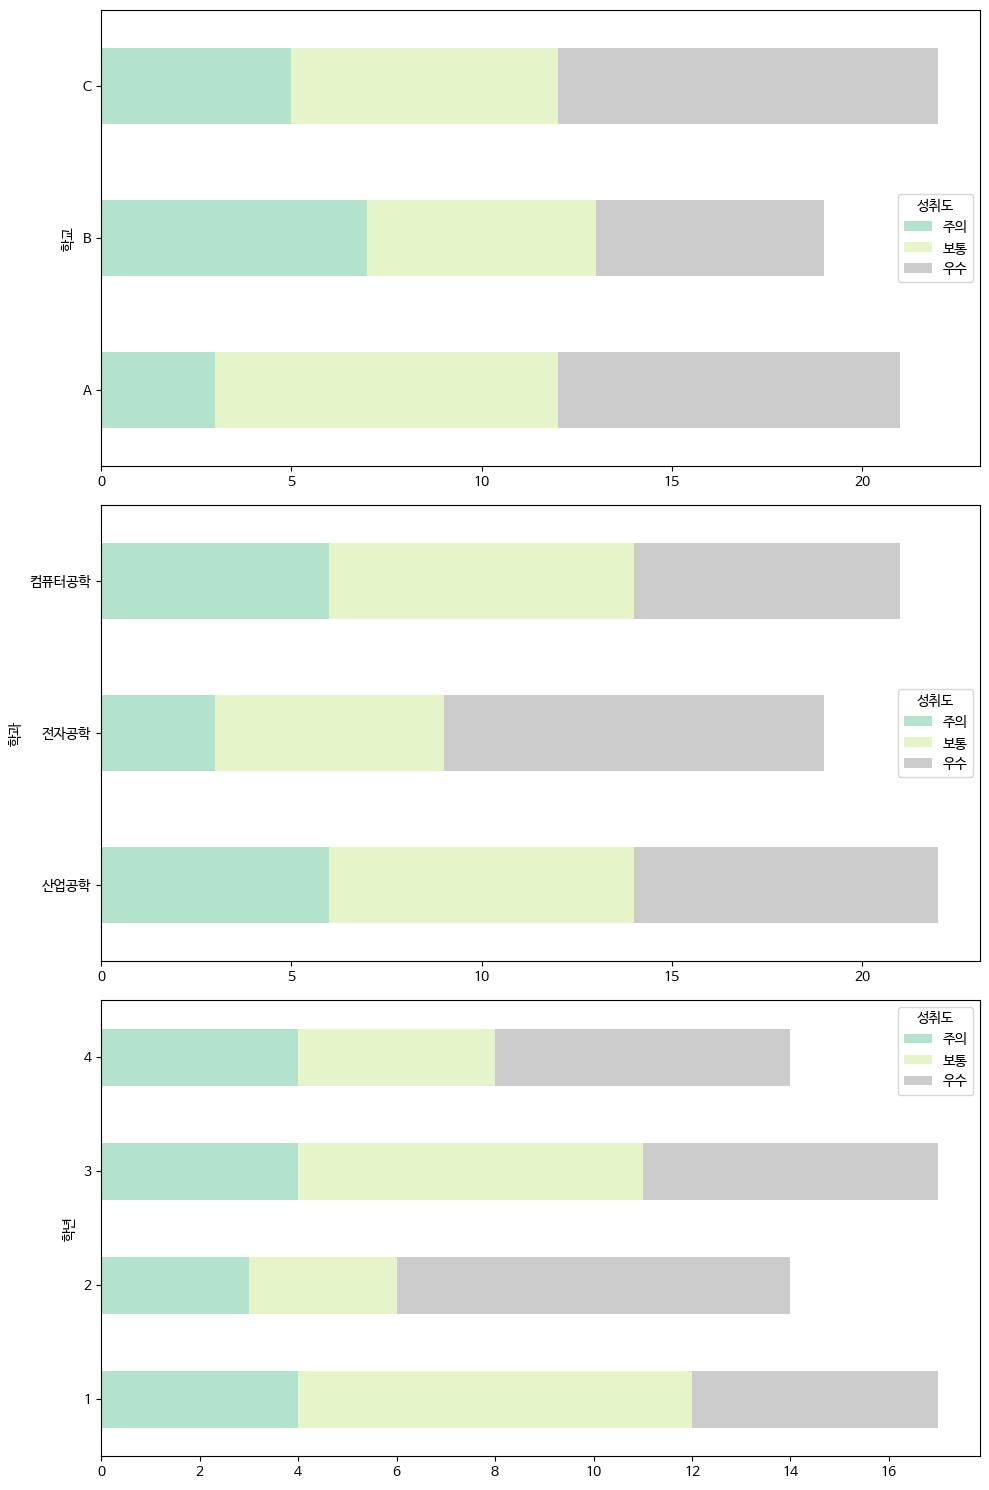

In [185]:
# TODO: 누적막대그래프 그리기

grouped_by_school = df_all.groupby(['학교', '성취도']).size().reset_index(name='학생수')
grouped_by_major = df_all.groupby(['학과', '성취도']).size().reset_index(name='학생수')
grouped_by_grade = df_all.groupby(['학년', '성취도']).size().reset_index(name='학생수')

pivot_school = grouped_by_school.pivot_table(values='학생수', index='학교', columns='성취도', fill_value=0)
pivot_major = grouped_by_major.pivot_table(values='학생수', index='학과', columns='성취도', fill_value=0)
pivot_grade = grouped_by_grade.pivot_table(values='학생수', index='학년', columns='성취도', fill_value=0)

fig, axs = plt.subplots(3, 1, figsize=(10, 15))

#학교s
pivot_school.loc[:, ['주의', '보통', '우수']].plot(kind='barh', stacked=True, ax=axs[0], colormap='Pastel2')
axs[0].set_ylabel('학교')

#학과s
pivot_major.loc[:, ['주의', '보통', '우수']].plot(kind='barh', stacked=True, ax=axs[1], colormap='Pastel2')
axs[1].set_ylabel('학과')

#학년s
pivot_grade.loc[:, ['주의', '보통', '우수']].plot(kind='barh', stacked=True, ax=axs[2], colormap='Pastel2')
axs[2].set_ylabel('학년')


plt.tight_layout()
plt.show()